## Crawling
### Pre-requisite
1. Install **Mecab**
```
git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
cd Mecab-ko-for-Google-Colab
bash install_mecab-ko_on_colab190912.sh
```
2. Install python-crawling and NLP package
```
pip install beautifulsoup4
pip install newspaper3k
pip install konlpy
```

### Seletor

### Beautifulsoup 실습

In [1]:
from bs4 import BeautifulSoup

#- HTML 문서를 문자열 html로 저장합니다.
html = '''
<html> 
    <head> 
    </head> 
    <body> 
        <h1> 장바구니
            <p id='clothes' class='name' title='라운드티'> 라운드티
                <span class = 'number'> 25 </span> 
                <span class = 'price'> 29000 </span> 
                <span class = 'menu'> 의류</span> 
                <a href = 'http://www.naver.com'> 바로가기 </a> 
            </p> 
            <p id='watch' class='name' title='시계'> 시계
                <span class = 'number'> 28 </span>
                <span class = 'price'> 32000 </span> 
                <span class = 'menu'> 악세서리 </span> 
                <a href = 'http://www.facebook.com'> 바로가기 </a> 
            </p> 
        </h1> 
    </body> 
</html>
'''

#- BeautifulSoup 인스턴스를 생성합니다.
#- 두번째 매개변수는 분석할 분석기(parser)의 종류입니다.
soup = BeautifulSoup(html, 'html.parser')

In [2]:
print(soup.select('body'))

[<body>
<h1> 장바구니
            <p class="name" id="clothes" title="라운드티"> 라운드티
                <span class="number"> 25 </span>
<span class="price"> 29000 </span>
<span class="menu"> 의류</span>
<a href="http://www.naver.com"> 바로가기 </a>
</p>
<p class="name" id="watch" title="시계"> 시계
                <span class="number"> 28 </span>
<span class="price"> 32000 </span>
<span class="menu"> 악세서리 </span>
<a href="http://www.facebook.com"> 바로가기 </a>
</p>
</h1>
</body>]


In [3]:
print(soup.select('p'))

[<p class="name" id="clothes" title="라운드티"> 라운드티
                <span class="number"> 25 </span>
<span class="price"> 29000 </span>
<span class="menu"> 의류</span>
<a href="http://www.naver.com"> 바로가기 </a>
</p>, <p class="name" id="watch" title="시계"> 시계
                <span class="number"> 28 </span>
<span class="price"> 32000 </span>
<span class="menu"> 악세서리 </span>
<a href="http://www.facebook.com"> 바로가기 </a>
</p>]


In [4]:
print(soup.select('h1 .name .menu'))

[<span class="menu"> 의류</span>, <span class="menu"> 악세서리 </span>]


In [5]:
print(soup.select('html > h1'))

[]


In [6]:
print(soup.select('body > h1'))

[<h1> 장바구니
            <p class="name" id="clothes" title="라운드티"> 라운드티
                <span class="number"> 25 </span>
<span class="price"> 29000 </span>
<span class="menu"> 의류</span>
<a href="http://www.naver.com"> 바로가기 </a>
</p>
<p class="name" id="watch" title="시계"> 시계
                <span class="number"> 28 </span>
<span class="price"> 32000 </span>
<span class="menu"> 악세서리 </span>
<a href="http://www.facebook.com"> 바로가기 </a>
</p>
</h1>]


### newspaper3k
뉴스 데이터를 크롤링하기 위한 패키지. 뉴스 기사 url로부터 뉴스 기사의 제목과 텍스트를 추출한다.
* 필요한 것 : 뉴스 url!!!

In [7]:
from newspaper import Article

#- 파싱할 뉴스 기사 주소입니다.
url = 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=030&aid=0002881076'

#- 언어가 한국어이므로 language='ko'로 설정해줍니다.
article = Article(url, language='ko')
article.download()
article.parse()

In [8]:
#- 기사 제목을 출력합니다.
print('기사 제목 :')
print(article.title)
print('')

#- 기사 내용을 출력합니다.
print('기사 내용 :')
print(article.text)

기사 제목 :
[AI 사피엔스 시대]자연어처리 기술, 컴퓨팅 파워 경쟁 시대로

기사 내용 :
[Copyright ⓒ 전자신문 & 전자신문인터넷, 무단전재 및 재배포 금지]

주로 아이디어와 기술력으로 경쟁했던 자연어처리 인공지능(AI) 분야는 점차 컴퓨팅 파워 싸움으로 무게 추가 이동하고 있다. 모델이 대형화되면서 향상된 퍼포먼스 확보에 필요한 자금 규모도 커지고 있다. 자칫 대기업 자본력에 휘둘릴 수 있다는 우려도 함께 나온다.자연어처리(NLP)는 인간이 사용하는 언어 체계를 기계가 인식하도록 알고리즘을 디자인하는 기술이다. 흔히 말하는 컴퓨터 혹은 인간과 대화하는 컴퓨터 관련 기술이 포함된다.목적에 따라 세 가지 카테고리로 나뉜다. 인간이 제기한 질문에 자동으로 적절한 답을 찾아주는 '질의응답(QA)', 원하는 업무를 지시했을 때 작업을 수행하는 '테스크 컴플리션', 그리고 특별한 목적이 없는 대화를 의미하는 '오픈도메인 컨버세이션(비목적성 대화)'이 있다. 각기 발전해왔던 세 가지 기술은 지난 2018년 구글의 인공지능 언어모델 '버트(BERT)'의 등장으로 패러다임이 전환됐다. 압도적인 성능으로 대량의 프리트레이닝(사전학습)이 가능해지면서 굳이 셋을 구분할 필요가 없어진 것이다.기계학습 연구에서 모델을 학습할 때는 지도학습과 비지도학습, 강화학습 중 하나를 골라 활용한다. 지도학습은 사람이 적절한 입력과 출력을 부여하는 방식이다. 정답이 정해져 있고 기계의 정답률도 쉽게 측정할 수 있다. 반면에 비지도학습은 정답이 정해지지 않은 데이터에 대해서도 기계가 스스로 클러스터링 등을 통해 학습한다. 체계화되지 않은 대량의 데이터를 학습 가능하지만 학습이 맞게 됐는지 확인하기 어렵다.버트는 기존 AI 학습 방법을 혁신적으로 바꿔놨다는 평가를 받는다. 자연어처리를 교사 없이 양방향으로 사전 학습하는 최초의 시스템이다. 비지도학습 방식을 사용하면서도 기존 존재했던 어떤 기술보다 뛰어난 성능을 보여준다. 최근 1년 반 동안 버트를 필두로 AI 모델은 급격히 대형화되

### 뉴스 URL 구조
* `&sid1=` : 뉴스가 속한 카테고리의 번호
    * 100 : 정치
    * 101 : 경제
    * 102 : 사회
    * 103 : 생활/문화
    * 104 : 세계
    * 105 : IT/과학
    * 110 : 오피니언
* `&date=` : 해당 뉴스들이 속한 날짜
* `&page=` : 몇 페이지인가

# 뉴스 크롤러 만들기

In [10]:
# 크롤러를 만들기 전 필요한 도구들을 임포트합니다.
import requests
import pandas as pd
from bs4 import BeautifulSoup

# 페이지 수, 카테고리, 날짜를 입력값으로 받습니다.
def make_urllist(page_num, code, date): 
    urllist= []
    for i in range(1, page_num + 1):
        url = 'https://news.naver.com/main/list.nhn?mode=LSD&mid=sec&sid1='+str(code)+'&date='+str(date)+'&page='+str(i)
        headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/54.0.2840.90 Safari/537.36'}
        news = requests.get(url, headers=headers)

    # BeautifulSoup의 인스턴스 생성합니다. 파서는 html.parser를 사용합니다.
    soup = BeautifulSoup(news.content, 'html.parser')

    # CASE 1
    news_list = soup.select('.newsflash_body .type06_headline li dl')
    # CASE 2
    news_list.extend(soup.select('.newsflash_body .type06 li dl'))
        
    # 각 뉴스로부터 a 태그인 <a href ='주소'> 에서 '주소'만을 가져옵니다.
    for line in news_list:
        urllist.append(line.a.get('href'))
    
    return urllist

In [11]:
url_list = make_urllist(2, 101, 20200506)
print('뉴스 기사의 개수: ',len(url_list))

뉴스 기사의 개수:  20


In [12]:
url_list[:5]

['https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=057&aid=0001451707',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=001&aid=0011591771',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=057&aid=0001451706',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=008&aid=0004404654',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=022&aid=0003462769']

In [13]:
idx2word = {'101' : '경제', '102' : '사회', '103' : '생활/문화', '105' : 'IT/과학'}

In [14]:
from newspaper import Article

#- 데이터프레임을 생성하는 함수입니다.
def make_data(urllist, code):
    text_list = []
    for url in urllist:
        article = Article(url, language='ko')
        article.download()
        article.parse()
        text_list.append(article.text)

    #- 데이터프레임의 'news' 키 아래 파싱한 텍스트를 밸류로 붙여줍니다.
    df = pd.DataFrame({'news': text_list})

    #- 데이터프레임의 'code' 키 아래 한글 카테고리명을 붙여줍니다.
    df['code'] = idx2word[str(code)]
    
    return df

In [15]:
data = make_data(url_list, 101)
#- 상위 10개만 출력해봅니다.
data[:10]

,news,code
0,휴온스USA가 최근 미국 워싱턴 주정부에 방역용품 공급 업체로 선정돼 물품 공급에 ...,경제
1,(뉴욕=연합뉴스) 오진우 연합인포맥스 특파원 = 뉴욕증시에서 주요 지수는 6일 미국...,경제
2,bhc치킨이 포근해진 날씨와 가정의 달을 맞아 다 함께 즐길 수 있는 연령대별 맞춤...,경제
3,기사 섹션 분류 안내\n\n기사의 섹션 정보는 해당 언론사의 분류를 따르고 있습니다...,경제
4,이재용 삼성전자 부회장이 6일 자신과 삼성의 과오와 관련해 대국민 사과를 했다. 이...,경제
5,이재용 삼성전자 부회장이 6일 대국민 사과에서 내놓은 핵심 메시지의 하나는 ‘무노조...,경제
6,PICK 안내 해당 언론사가 주요기사로\n\n직접 선정한 기사입니다. 언론사 편집판...,경제
7,씨엘바이오가 가정의 달 5월을 맞아 코로나19에 가장 취약한 요양기관 어르신을 위해...,경제
8,코로나19 확산으로 내국인의 해외여행이 거의 중단되면서 아웃바운드 여행업체 1위인 ...,경제
9,제너럴모터스(GM) 기업 로고 /AFP연합뉴스 제너럴모터스(GM) 기업 로고 /AF...,경제


In [16]:
code_list = [102, 103, 105]

code_list

[102, 103, 105]

In [22]:
def make_total_data(page_num, code_list, date):
    df = None

    for code in code_list:
        url_list = make_urllist(page_num, code, date)
        df_temp = make_data(url_list, code)
        print(str(code)+'번 코드에 대한 데이터를 만들었습니다.')

        if df is not None:
            df = pd.concat([df, df_temp])
        else:
            df = df_temp

    return df

In [23]:
df = make_total_data(1, code_list, 20200506)

102번 코드에 대한 데이터를 만들었습니다.
103번 코드에 대한 데이터를 만들었습니다.
105번 코드에 대한 데이터를 만들었습니다.


In [24]:
print('뉴스 기사의 개수: ',len(df))

뉴스 기사의 개수:  60


In [25]:
df.sample(10) #임의로 10개의 샘플 출력

,news,code
17,[디지털데일리 이종현기자] 공공시설을 이용하거나 공공기관 운영 강좌 수강을 신청할 ...,IT/과학
14,한남대 조형예술학부 회화전공 박경범 교수(왼쪽)가 이광섭 총장에게 발전기금 1000...,생활/문화
2,(서울=연합뉴스) 대한약사회가 6일부터 코로나바이러스 감염증 대응 체계를 '사회적 ...,IT/과학
8,[서울=뉴시스] 박주연 기자 = BMW 공식 딜러 바바리안모터스가 프로야구단 SK와...,생활/문화
10,기사 섹션 분류 안내\n\n기사의 섹션 정보는 해당 언론사의 분류를 따르고 있습니다...,생활/문화
3,©아가타 파리(AGATHA PARIS) ©아가타 파리(AGATHA PARIS)\n\...,생활/문화
9,기사 섹션 분류 안내\n\n기사의 섹션 정보는 해당 언론사의 분류를 따르고 있습니다...,생활/문화
15,[서울경제] 넷플릭스의 망 무임승차와 텔레그램의 불법 촬영물 유통을 막는 법안이 국...,IT/과학
10,/사진=뉴스1 /사진=뉴스1\n\n[파이낸셜뉴스] 과학기술정보통신부가 6일 1조원대...,IT/과학
6,기사 섹션 분류 안내\n\n기사의 섹션 정보는 해당 언론사의 분류를 따르고 있습니다...,생활/문화


In [26]:
# 실제 크롤링
df = make_total_data(10, code_list, 20200506)

102번 코드에 대한 데이터를 만들었습니다.
103번 코드에 대한 데이터를 만들었습니다.
105번 코드에 대한 데이터를 만들었습니다.


In [27]:
import os

# 데이터프레임 파일을 csv 파일로 저장
csv_path = os.getenv("HOME") + "/workspace/Modulabs-Dasol/Study/assets/news_crawler/news_data_test.csv"
df.to_csv(csv_path, index=False)

if os.path.exists(csv_path):
    print('{} File Saved!'.format(csv_path))

/home/dasol-ubuntu/workspace/Modulabs-Dasol/Study/assets/news_crawler/news_data_test.csv File Saved!


# Data Preprocessing

In [28]:
csv_path = os.getenv("HOME") + "/workspace/Modulabs-Dasol/Study/assets/news_crawler/news_data_test.csv"
df = pd.read_table(csv_path, sep=',')
df.head()

,news,code
0,경찰 관련 이미지. 사진=게티이미지 경찰 관련 이미지. 사진=게티이미지\n\n함께 ...,사회
1,동영상 뉴스\n\n경기 용인시에서 28일 만에 처음으로 지역사회 감염 코로나19 확...,사회
2,이기형 경기도의원은 “한강신도시 운양동 지역의‘운양1 초·중 병설학교’ 신설 건이 ...,사회
3,6일 오후 이천시 서희청소년문화센터에 마련된 이천 물류창고 공사장 화재참사 분향소에...,사회
4,이재명 경기도지사가 6일 오후 SNS를 통해 ‘경기도 계곡정비 현황 보고’를 통해 ...,사회


### 정규 표현식으로 한글 외 특수문자 제거

In [30]:
# 정규 표현식을 이용해서 한글 외의 문자는 전부 제거합니다.
df['news'] = df['news'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
df['news']

0      파주시청 사진제공파주시 파주시청 사진제공파주시파주파이낸셜뉴스 강근주 기자 파주시는 ...
1      동영상 뉴스이천 물류창고 화재 발화지점으로 지목된 지하 층에서 산소절단기의 산소 공...
2      황범순 의정부시 부시장 을지대학교 의정부캠퍼스 및 부속병원 공사현장 안전점검 사진제...
3      귀갓길 여성을 쫓아가 성범죄를 시도한 대 남성이 구속됐습니다서울 강남경찰서는 강간상...
4      서울연합뉴스 대한약사회가 일부터 코로나바이러스 감염증 대응 체계를 사회적 거리두기에...
                             ...                        
595    지디넷코리아이도원 기자스마일게이트알피지대표 지원길는 블록버스터 핵앤슬래시 다중접속역...
596    모두의셔틀 로고 모두의셔틀 제공  뉴스 모두의셔틀 로고 모두의셔틀 제공  뉴스서울뉴...
597    휴온스의 신종 코로나바이러스 감염증코로나 관련 방역용품이 미국 수출길에 오른다휴온스...
598    코로나 치료제백신 개발 범정부 지원단은 오늘일부터 이틀 동안 관련 기업들을 대상으로...
599      전자신문  전자신문인터넷 무단전재 및 재배포 금지이재용 삼성전자 부회장이 세 경...
Name: news, Length: 600, dtype: object

### 결측치 제거

In [31]:
print(df.isnull().sum())

news    0
code    0
dtype: int64


### 중복 제거

In [32]:
# 중복된 샘플들을 제거합니다.
df.drop_duplicates(subset=['news'], inplace=True)

print('뉴스 기사의 개수: ',len(df))

뉴스 기사의 개수:  552


In [33]:
# 중복 샘플 제거
df.drop_duplicates(subset=['news'], inplace=True)

print('뉴스 기사의 개수: ',len(df))

뉴스 기사의 개수:  552


### Matplotlib 한글폰트 설정

In [37]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [36]:
font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')

print(font_list)

['/usr/share/fonts/truetype/freefont/FreeSansBold.ttf', '/usr/share/fonts/truetype/lohit-bengali/Lohit-Bengali.ttf', '/usr/share/fonts/truetype/liberation2/LiberationSans-Regular.ttf', '/usr/share/fonts/truetype/kacst/KacstDigital.ttf', '/usr/share/fonts/truetype/fonts-deva-extra/chandas1-2.ttf', '/usr/share/fonts/truetype/fonts-telu-extra/vemana2000.ttf', '/usr/share/fonts/truetype/lohit-devanagari/Lohit-Devanagari.ttf', '/usr/share/fonts/truetype/Gargi/Gargi.ttf', '/usr/share/fonts/truetype/kacst/KacstNaskh.ttf', '/usr/share/fonts/truetype/fonts-orya-extra/utkal.ttf', '/usr/share/fonts/truetype/tlwg/Umpush-BoldOblique.ttf', '/usr/share/fonts/truetype/tlwg/TlwgTypo.ttf', '/usr/share/fonts/truetype/kacst/KacstFarsi.ttf', '/usr/share/fonts/truetype/malayalam/Karumbi.ttf', '/usr/share/fonts/truetype/tlwg/TlwgTypewriter-Oblique.ttf', '/usr/share/fonts/truetype/fonts-gujr-extra/padmaa-Bold.1.1.ttf', '/usr/share/fonts/truetype/freefont/FreeSansBoldOblique.ttf', '/usr/share/fonts/truetype/ti

In [40]:
# 한글을 지원하는 폰트 찾기
print([i for i in font_list if 'CJK' in i])

['/usr/share/fonts/opentype/noto/NotoSerifCJK-Black.ttc', '/usr/share/fonts/opentype/noto/NotoSansCJK-Bold.ttc', '/usr/share/fonts/opentype/noto/NotoSansCJK-Light.ttc', '/usr/share/fonts/opentype/noto/NotoSansCJK-Black.ttc', '/usr/share/fonts/opentype/noto/NotoSansCJK-DemiLight.ttc', '/usr/share/fonts/opentype/noto/NotoSerifCJK-Light.ttc', '/usr/share/fonts/opentype/noto/NotoSerifCJK-Medium.ttc', '/usr/share/fonts/opentype/noto/NotoSerifCJK-Bold.ttc', '/usr/share/fonts/opentype/noto/NotoSansCJK-Thin.ttc', '/usr/share/fonts/opentype/noto/NotoSerifCJK-Regular.ttc', '/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc', '/usr/share/fonts/opentype/noto/NotoSerifCJK-ExtraLight.ttc', '/usr/share/fonts/opentype/noto/NotoSerifCJK-SemiBold.ttc', '/usr/share/fonts/opentype/noto/NotoSansCJK-Medium.ttc']


In [41]:
font_location = '/usr/share/fonts/opentype/noto/NotoSerifCJK-Black.ttc'
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

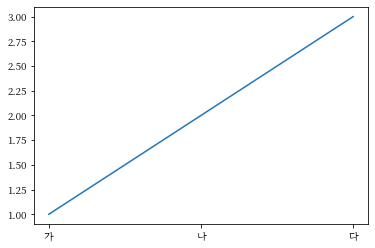

In [42]:
# test
plt.plot(['가', '나', '다'], [1, 2, 3])

<AxesSubplot:>

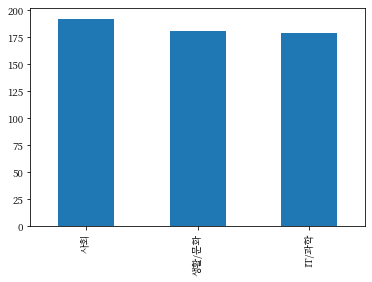

In [43]:
df['code'].value_counts().plot(kind = 'bar')

In [44]:
print(df.groupby('code').size().reset_index(name = 'count'))

    code  count
0  IT/과학    179
1     사회    192
2  생활/문화    181


## Tokenizing
자연어 처리에서 대부분의 경우 문자열은 특정 단위로 나누어져야 한다. 이 특정 단위를 **토큰(token)** 이라 한다.
* `Mecab.morphs` : 입력 문자열을 형태소 단위로 나눔
* 자연어 처리에서는 토큰화 결과가 얼마나 정확한지에 따라 성능에 많은 영향을 줌!!! 형태소 분석기의 결과가 머신 러닝 결과의 성능에 큰 영향을 준다는 뜻.
* 한국어 처리의 경우 토큰화 과정을 주로 형태소 분석기를 사용해서 수행. 한국어의 경우 교착어라는 특성으로 인해 조사, 어미 등이 붙어있어 띄어쓰기 단위로 토큰화를 할 경우에는 같은 단어임에도 다른 단어로 인식될 수 있다.

In [46]:
from konlpy.tag import Mecab
tokenizer = Mecab()

kor_text = '밤에 귀가하던 여성에게 범죄를 시도한 대 남성이 구속됐다서울 제주경찰서는 \
            상해 혐의로 씨를 구속해 수사하고 있다고 일 밝혔다씨는 지난달 일 피해 여성을 \
            인근 지하철 역에서부터 따라가 폭행을 시도하려다가 도망간 혐의를 받는다피해 \
            여성이 저항하자 놀란 씨는 도망갔으며 신고를 받고 주변을 수색하던 경찰에 \
            체포됐다피해 여성은 이 과정에서 경미한 부상을 입은 것으로 전해졌다'

#- 형태소 분석, 즉 토큰화(tokenization)를 합니다.
print(tokenizer.morphs(kor_text))

['밤', '에', '귀가', '하', '던', '여성', '에게', '범죄', '를', '시도', '한', '대', '남성', '이', '구속', '됐', '다', '서울', '제주', '경찰서', '는', '상해', '혐의', '로', '씨', '를', '구속', '해', '수사', '하', '고', '있', '다고', '일', '밝혔', '다', '씨', '는', '지난달', '일', '피해', '여성', '을', '인근', '지하철', '역', '에서부터', '따라가', '폭행', '을', '시도', '하', '려다가', '도망간', '혐의', '를', '받', '는다', '피해', '여성', '이', '저항', '하', '자', '놀란', '씨', '는', '도망갔으며', '신고', '를', '받', '고', '주변', '을', '수색', '하', '던', '경찰', '에', '체포', '됐', '다', '피해', '여성', '은', '이', '과정', '에서', '경미', '한', '부상', '을', '입', '은', '것', '으로', '전해졌', '다']


## Stopwords(불용어) 제거
불필요한 토큰들을 제거하는 과정.
* 불용어 : 데이터 전체에서 꽤 많이 등장하지만, 실제로 자연어 처리에는 큰 영향을 주지 않는 중요하지 않은 단어들.
    * 한국어에서는 주로 조사나 접사 등이 불용어에 속한다.
    * 해당 데이터의 특성을 인해 자주 등장할 수 밖에 없는 단어들도 불용어(ex.파이낸셜뉴스)

In [47]:
stopwords = ['에','는','은','을','했','에게','있','이','의','하','한','다','과','때문','할','수','무단','따른','및','금지','전재','경향신문','기자','는데','가','등','들','파이낸셜','저작','등','뉴스']

In [48]:
# 토큰화 및 토큰화 과정에서 불용어를 제거하는 함수입니다.
def preprocessing(data):
    text_data = []

    for sentence in data:
        temp_data = []
        #- 토큰화
        temp_data = tokenizer.morphs(sentence) 
        #- 불용어 제거
        temp_data = [word for word in temp_data if not word in stopwords] 
        text_data.append(temp_data)

    text_data = list(map(' '.join, text_data))

    return text_data

In [49]:
text_data = preprocessing(df['news'])
print(text_data[0])

파주 시청 사진제 공파 주시 파주 시청 사진 제공 파주시 파주 강근주 파 주 시 일 관내 취약 계층 만 가구 대해 정부 긴급 재난 지원금 입금 완료 다파 주 시민 받 긴급 재난 지원금 인 이상 가구 기준 으로 만 원 받 게 되 며 인 가구 만 원 인 가구 만 원 인 가구 만 원 정부 발표 긴급 재난 지원금 파주 시민 지급 금액 다른 이유 국비 지방비 부담 비율 다파 주 시 이미 모든 시민 경기도 파주시 재난 기본 소득 인 당 각 만 원 지급 고 어 시민 국비 지원금 만 지급 며 인 가구 기준 으로 총 지원 금액 파주시 재난 기본소득 만 원 경기도 재난 기본소득 만 원 정부 긴급 재난 지원금 만 원 총 만 원 받 게 된다 취약 계층 아닌 시민 오 월일 부터 소지 고 신용 체크카드 사 홈페이지 에서 긴급 재난 지원금 지원 신청 세대주 가족 지원금 일괄 신청 해야 한다 한편 파 주 시 일 김정기 부시장 단장 으로 긴급 재난 지원금 추진 태 스 크 포스 를 구성 해 긴급 재난 지원금 원활 게 지급 될 도록 지원 한다 권 자 재 배포


# Traning
나이브 베이즈 분류기 : 아주 정밀한 **통계** 알고리즘. 데이터량에 영향을 많이 받는다. 분류기 성능이 낮으면 대부분 데이터가 모자라기 때문!!

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [51]:
X_train, X_test, y_train, y_test = train_test_split(text_data, df['code'], random_state = 0)

### Vectorizing
나이브 베이즈 분류기를 사용하기 위해서는 텍스트 데이터를 벡터로 변환해야 한다.

TF-IDF : Term Frequency Inverse Document Frequency
* To find how relevant a term is in a document
> relevant : A word relevance is the amount of info that gives about its context
* TF measures how frequently a term occurs in a document
    * If a term occurs more times than other terms in a document, the term has more relevance than other terms for the document
* IDF : Log(Total # of Docs / # of Docs with the term in it)

In [53]:
#- 단어의 수를 카운트
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

#- 카운트벡터라이저의 결과로부터 TF-IDF 결과를 얻음.
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

#- X_train은 TF-IDF 벡터, y_train은 레이블
clf = MultinomialNB().fit(X_train_tfidf, y_train)

# Evaluation

In [54]:
def tfidf_vectorizer(data):
    data_counts = count_vect.transform(data)
    data_tfidf = tfidf_transformer.transform(data_counts)
    return data_tfidf

In [55]:
new_sent = preprocessing(["민주당 일각에서 법사위의 체계·자구 심사 기능을 없애야 한다는 \
                           주장이 나오는 데 대해 “체계·자구 심사가 법안 지연의 수단으로 \
                          쓰이는 것은 바람직하지 않다”면서도 “국회를 통과하는 법안 중 위헌\
                          법률이 1년에 10건 넘게 나온다. 그런데 체계·자구 심사까지 없애면 매우 위험하다”고 반박했다."])
print(clf.predict(tfidf_vectorizer(new_sent)))

['IT/과학']


In [56]:
new_sent = preprocessing(["인도 로맨틱 코미디 영화 <까립까립 싱글>(2017)을 봤을 때 나는 두 눈을 의심했다. \
                          저 사람이 남자 주인공이라고? 노안에 가까운 이목구비와 기름때로 뭉친 파마머리와, \
                          대충 툭툭 던지는 말투 등 전혀 로맨틱하지 않은 외모였다. 반감이 일면서 \
                          ‘난 외모지상주의자가 아니다’라고 자부했던 나에 대해 회의가 들었다.\
                           티브이를 꺼버릴까? 다른 걸 볼까? 그런데, 이상하다. 왜 이렇게 매력 있지? 개구리와\
                            같이 툭 불거진 눈망울 안에는 어떤 인도 배우에게서도 느끼지 못한 \
                            부드러움과 선량함, 무엇보다 슬픔이 있었다. 2시간 뒤 영화가 끝나고 나는 완전히 이 배우에게 빠졌다"])
print(clf.predict(tfidf_vectorizer(new_sent)))

['생활/문화']


In [57]:
new_sent = preprocessing(["20분기 연속으로 적자에 시달리는 LG전자가 브랜드 이름부터 성능, 디자인까지 대대적인 변화를 \
                          적용한 LG 벨벳은 등장 전부터 온라인 커뮤니티를 뜨겁게 달궜다. 사용자들은 “디자인이 예쁘다”, \
                          “슬림하다”는 반응을 보이며 LG 벨벳에 대한 기대감을 드러냈다."])
print(clf.predict(tfidf_vectorizer(new_sent)))

['IT/과학']


In [58]:
y_pred = clf.predict(tfidf_vectorizer(X_test))
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       IT/과학       0.85      0.86      0.85        51
          사회       0.80      0.93      0.86        42
       생활/문화       0.86      0.71      0.78        45

    accuracy                           0.83       138
   macro avg       0.84      0.83      0.83       138
weighted avg       0.84      0.83      0.83       138



# 모델 성능 개선하기
### 형태소 분석기
Konlpy
* Mecab
* Komoran
* Hannanum
* Kkma
* Okt

### 불용어를 추가
불용어를 추가하여 데이터셋으로부터 제거.
* 무엇을 불용어로 추가할 것인가
* 지나치게 빈도가 낮은 단어? 지나치게 빈도가 높은 단어?

### 데이터 추가
* 다른 날짜 데이터
* 이미 수집한 데이터와 추가로 수집된 데이터를 적절히 합치는 법?
* 적절히 데이터를 섞는 법?